# 待答問題一：教育年數與薪資高低是否有相關?
# 待答問題二：種族對於薪資高低是否有相關？
# 待答問題三：性別對薪資高低是否有相關？


In [26]:
import numpy as np
import pandas as pd
import csv
import matplotlib
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/adult.data.csv', header=None)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
data1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [30]:
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
education_income = data1.groupby('income')['education_num'].agg(['mean', 'std', 'median'])
education_income

,mean,std,median
income,,,
<=50K,9.595065,2.436147,9.0
>50K,11.611657,2.385129,12.0


In [32]:
income_edu = data1[['income', 'education_num']]
import plotly.express as px
fig = px.violin(income_edu, y="education_num", x="income", color="income",
                box=True, points="all",
          hover_data=income_edu.columns)
fig.show()

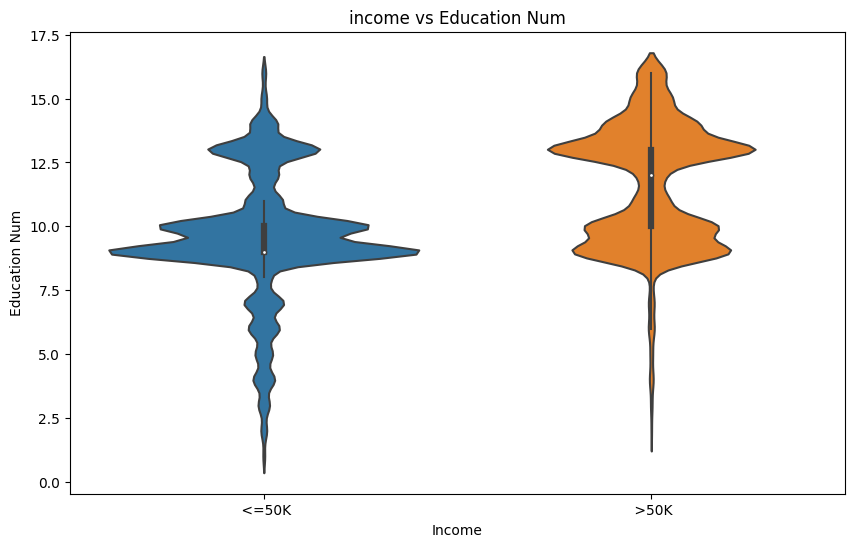

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # 設置圖形大小
sns.violinplot(x="income", y="education_num", data = data1)
plt.xlabel("Income")
plt.ylabel("Education Num")
plt.title("income vs Education Num")
plt.show()

從小提琴圖當中可以觀察，在小於等於50K的群體中，最大的比例出現在教育年數9年；  
而大於50K的群體中最大值出現在教育年數13年。  
但特別的是小於等於50K的群體中教育13年的群體仍佔該群體中第三大，意即亦有許多教育年數高但相對低薪的職業，  
對比到台灣也許就是像中小學教師，需要唸到大學或是研究所，但薪水相對低。

In [33]:
race_by_job = data1.groupby(['race', 'income'])['sex'].count().unstack()
race_by_job

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


In [34]:
race_by_job['high_income_ratio'] = race_by_job[' >50K'] / race_by_job.sum(axis=1)
race_by_job['low_income_ratio'] = race_by_job[' <=50K'] / race_by_job.sum(axis=1)
race_by_job

income,<=50K,>50K,high_income_ratio,low_income_ratio
race,,,,
Amer-Indian-Eskimo,275,36,0.115756,0.883915
Asian-Pac-Islander,763,276,0.265640,0.734172
Black,2737,387,0.123880,0.876086
Other,246,25,0.092251,0.907440
White,20699,7117,0.255860,0.744133


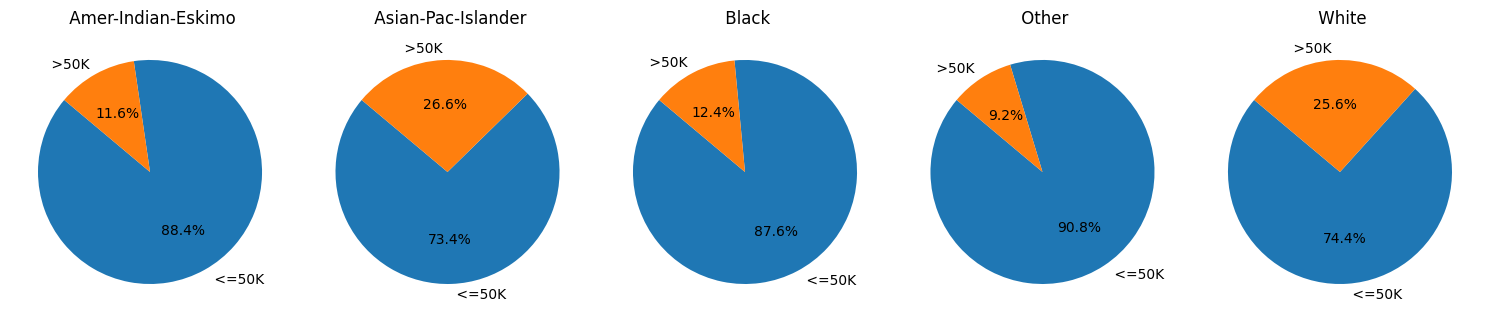

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
cross_table = pd.crosstab(data1['race'], data1['income'])
plt.figure(figsize=(15, 5))

for race in cross_table.index:
    plt.subplot(1, len(cross_table), cross_table.index.get_loc(race) + 1)
    plt.pie(cross_table.loc[race], labels=cross_table.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'{race}')

plt.tight_layout()
plt.show()

從以上圖表可觀察，白人與亞洲人群體中，高薪者(>50k)所占比例最高，而印地安裔與其他種族高薪者在該群體中占比最低。  
相較起來可以推論白人與亞洲人獲得高薪的機會稍高。

In [36]:
sex_by_job = data1.groupby(['sex', 'income'])['sex'].count().unstack()
sex_by_job

income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


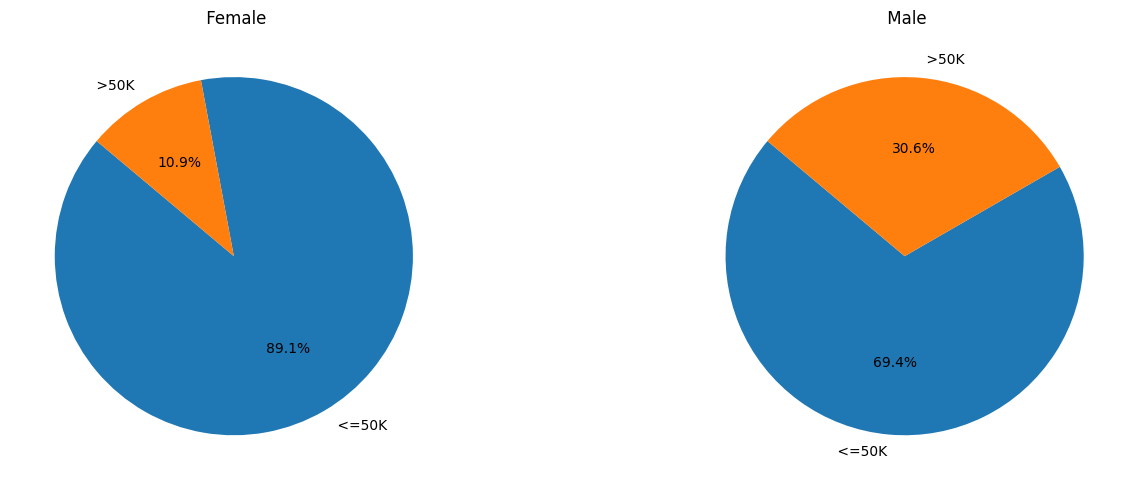

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
cross_table = pd.crosstab(data1['sex'], data1['income'])
plt.figure(figsize=(15, 5))

for sex in cross_table.index:
    plt.subplot(1, len(cross_table), cross_table.index.get_loc(sex) + 1)
    plt.pie(cross_table.loc[sex], labels=cross_table.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'{sex}')

plt.tight_layout()
plt.show()

從圖表可知，男女性在各自的群體中獲得高薪的比例有所不同，男性獲得高薪的機會在該群體中相對較高。  
但若男女性受訪人數如果能夠接近將會更高的可信度。